# This program generates figure 9

In [1]:
# Ignore warnings
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter('ignore')

#Process data    
import numpy as np
import xarray as xr

#Display data 
import cartopy
import cartopy.crs as ccrs
from cartopy.mpl.geoaxes import GeoAxes
from cartopy.vector_transform import vector_scalar_to_grid
from matplotlib.axes import Axes
import cartopy.feature as cfeature
from cartopy import config
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from mpl_toolkits.axes_grid1 import AxesGrid
import matplotlib.image as image
import matplotlib.pyplot as plt

#Writing data files
import pandas as pd

In [3]:
prod2000_60x60=np.load('originalcode/code/ipynb/prod2000_60x60.npy')
prod2005_60x60=np.load('originalcode/code/ipynb/prod2005_60x60.npy')
prod2010_60x60=np.load('originalcode/code/ipynb/prod2010_60x60.npy')

irrigated_maize_prod2000_60x60=np.load('originalcode/code/ipynb/irrigated_maize_prod2000_60x60.npy')
irrigated_maize_prod2005_60x60=np.load('originalcode/code/ipynb/irrigated_maize_prod2005_60x60.npy')
irrigated_maize_prod2010_60x60=np.load('originalcode/code/ipynb/irrigated_maize_prod2010_60x60.npy')

In [4]:
prod2000_60x60=np.nan_to_num(prod2000_60x60)
prod2005_60x60=np.nan_to_num(prod2005_60x60)
prod2010_60x60=np.nan_to_num(prod2010_60x60)
irrigated_maize_prod2000_60x60[irrigated_maize_prod2000_60x60<0]=0
irrigated_maize_prod2005_60x60[irrigated_maize_prod2005_60x60<0]=0
irrigated_maize_prod2010_60x60[irrigated_maize_prod2010_60x60<0]=0

In [5]:
all_prod2000_60x60=prod2000_60x60+irrigated_maize_prod2000_60x60
all_prod2005_60x60=prod2005_60x60+irrigated_maize_prod2005_60x60
all_prod2010_60x60=prod2010_60x60+irrigated_maize_prod2010_60x60
average_rainfed=(prod2000_60x60+prod2005_60x60+prod2010_60x60)/3
average_irrigated=(irrigated_maize_prod2000_60x60+irrigated_maize_prod2005_60x60+irrigated_maize_prod2010_60x60)/3
average_all=(all_prod2000_60x60+all_prod2005_60x60+all_prod2010_60x60)/3

In [6]:
average_rainfed

array([[   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       ...,
       [2135.09997654,  533.46667035, 4976.30000496, ...,    0.        ,
           0.        ,    0.        ],
       [ 348.66666746,  388.69999933, 2113.93337949, ...,    0.        ,
           0.        ,    0.        ],
       [ 597.43334579, 1903.6666495 , 3809.73335393, ...,    0.        ,
           0.        ,    0.        ]])

In [7]:
irrigated_maize_prod2010_60x60

array([[   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       [   0.        ,    0.        ,    0.        , ...,    0.        ,
           0.        ,    0.        ],
       ...,
       [2990.00000191,  500.99999905, 1020.60000515, ...,    0.        ,
           0.        ,    0.        ],
       [  49.        ,   53.80000019, 1136.4999876 , ...,    0.        ,
           0.        ,    0.        ],
       [ 562.09999275,  715.99999809, 3291.7000103 , ...,    0.        ,
           0.        ,    0.        ]])

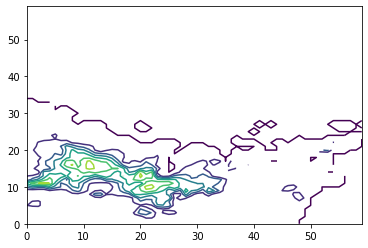

In [8]:
plt.contour(np.flipud(average_all))
average_all[average_all<0]=np.nan

In [9]:
#plt.contour(np.flipud(areainsqmeter[:30,:]))

In [10]:
[np.nanmin(average_all), np.nanmax(average_all)]

[0.0, 1383751.9262981415]

In [11]:
min_lon = -100 
min_lat = 35
max_lon = -70
max_lat = 65

In [12]:
fn1 = '/media/Data1/Climada/isimip3/nc4/GGCMI_Phase3_annual_Maize_ssp126_ensemble_mean.nc4'
# fn1='/media/Data1/Climada/isimip3/nc4/GGCMI_Phase3_annual_Maize_ssp126_gfdl-esm4_2015co2_ensemble_mean.nc4'
# fn1='/media/Data1/Climada/isimip3/nc4/GGCMI_Phase3_annual_ssp126_gfdl-esm4_cygma1p74.nc4'
#ds=xr.open_dataset(fn1,decode_times=False)
ds=xr.open_dataset(fn1)
cropped_ds = ds.sel(lat=slice(max_lat,min_lat), lon=slice(min_lon,max_lon))

#these data are change in % relative to average for the period of 1983 to 2013
averages1983_2013 = cropped_ds.sel(years=slice("1983", "2013")).mean(dim='years')+100
#theoritically the average values for the reference periods are 100s at all grid points
averages1996_2015 = cropped_ds.sel(years=slice("1995", "2014")).mean(dim='years')+100
averages2040_2069 = cropped_ds.sel(years=slice("2040", "2069")).mean(dim='years')+100
averages2070_2099 = cropped_ds.sel(years=slice("2070", "2099")).mean(dim='years')+100
#We convert the data as change relative to the period from 1996 to 2015 for consistent to our paper's reference
averages2050s_ssp126=(averages2040_2069/averages1996_2015-1)*average_all
averages2080s_ssp126=(averages2070_2099/averages1996_2015-1)*average_all

In [13]:
fn1 = '/media/Data1/Climada/isimip3/nc4/GGCMI_Phase3_annual_Maize_ssp370_ensemble_mean.nc4'
#ds=xr.open_dataset(fn1,decode_times=False)
ds=xr.open_dataset(fn1)
#select data in space
cropped_ds = ds.sel(lat=slice(max_lat,min_lat), lon=slice(min_lon,max_lon))
#select and  average data in time
#these data are change in % relative to average for the period of 1983 to 2013
averages1983_2013 = cropped_ds.sel(years=slice("1983", "2013")).mean(dim='years')+100
#theoritically the average values for the reference periods are 100s at all grid points
averages1996_2015 = cropped_ds.sel(years=slice("1995", "2014")).mean(dim='years')+100
averages2040_2069 = cropped_ds.sel(years=slice("2040", "2069")).mean(dim='years')+100
averages2070_2099 = cropped_ds.sel(years=slice("2070", "2099")).mean(dim='years')+100
averages2050s_ssp370=(averages2040_2069/averages1996_2015-1)*average_all
averages2080s_ssp370=(averages2070_2099/averages1996_2015-1)*average_all

In [14]:
fn1 = '/media/Data1/Climada/isimip3/nc4/GGCMI_Phase3_annual_Maize_ssp585_ensemble_mean.nc4'
#ds=xr.open_dataset(fn1,decode_times=False)
ds=xr.open_dataset(fn1)
cropped_ds = ds.sel(lat=slice(max_lat,min_lat), lon=slice(min_lon,max_lon))
#these data are change in % relative to average for the period of 1983 to 2013
averages1983_2013 = cropped_ds.sel(years=slice("1983", "2013")).mean(dim='years')+100
#theoritically the average values for the reference periods are 100s at all grid points
averages1996_2015 = cropped_ds.sel(years=slice("1995", "2014")).mean(dim='years')+100
averages2040_2069 = cropped_ds.sel(years=slice("2040", "2069")).mean(dim='years')+100
averages2070_2099 = cropped_ds.sel(years=slice("2070", "2099")).mean(dim='years')+100
averages2050s_ssp585=(averages2040_2069/averages1996_2015-1)*average_all
averages2080s_ssp585=(averages2070_2099/averages1996_2015-1)*average_all

In [15]:
averages2080s_ssp585

<xarray.Dataset>
Dimensions:       (lon: 60, lat: 60)
Coordinates:
  * lon           (lon) float64 -99.75 -99.25 -98.75 ... -71.25 -70.75 -70.25
  * lat           (lat) float64 64.75 64.25 63.75 63.25 ... 36.25 35.75 35.25
Data variables:
    yield change  (lat, lon) float64 nan nan nan nan nan ... nan nan nan nan nan

In [16]:
average_all.shape

(60, 60)

In [17]:
#cropped_ds = ds.sel(lat=slice(max_lat,min_lat), lon=slice(min_lon,max_lon)).sel(crop=slice('1','1'))
#note: slice(min_lat,max_lat) or slice(max_lat,min_lat) depends on how your data is saved in the file. If data is saved from north to south, you should use slice(max_lat,min_lat)

In [18]:
[averages1983_2013.squeeze().min(),averages1983_2013.squeeze().max()]

[<xarray.Dataset>
 Dimensions:       ()
 Data variables:
     yield change  float64 99.48,
 <xarray.Dataset>
 Dimensions:       ()
 Data variables:
     yield change  float64 100.1]

In [19]:
provinces= ['Ontario', 'Quebec','Manitoba','Wisconsin','Vermont','Nebraska','New York','Kansas','Illinois',
            'Delaware','Connecticut','Indiana','Missouri','Michigan','New Jersey','Kentucky','Minnesota',
            'Ohio','Iowa','Pennsylvania','Maryland','Virginia','West Virginia','North Dakota','South Dakota','Nunavut']
provinces1=['ON','QC','MB','WI','VT','NE','NY','KS','IL','DE','CT','IN','MO','MI','NJ','KY','MN','OH','IA','PA','MD','VA','WV','ND','SD','NU']
Latitudes= [50,53,56.4,44.5,44,41.5,43,38.5,40,39,41.6,40.3,38.6,44.2,39.8,37.8,46.4,
            40.4,42,41.2,39,38,39,47.7,44.5,62]
Longitudes=[-85,-76,-98.7,-89.5,-72,-100,-75,-98,-89,-73.5,-72.7,-86,-92.6,-84.5,-74.9,-84.3,-94.6,
            -83,-93.6,-77.2,-76.6,-78,-80.5,-99,-99,-98]

[11.381545222392862, -123302.18087053091]
[-1.436985029865259, -123302.18087053091]
[-14732.852215977886, -24524.227533803478]
[2.729962807128933, -131810.7469496874]
[-3.017955427650854, -131810.7469496874]
[-18090.518504445496, -30454.594172643556]
[0.0, -266182.00412370986]
[-9.283845863828573, -266182.00412370986]
[-32598.77667782825, -56307.85211843176]
[0.0, -480391.37361633644]
[-23.078270322268718, -480391.37361633644]
[-63525.447458414164, -109653.89770418833]


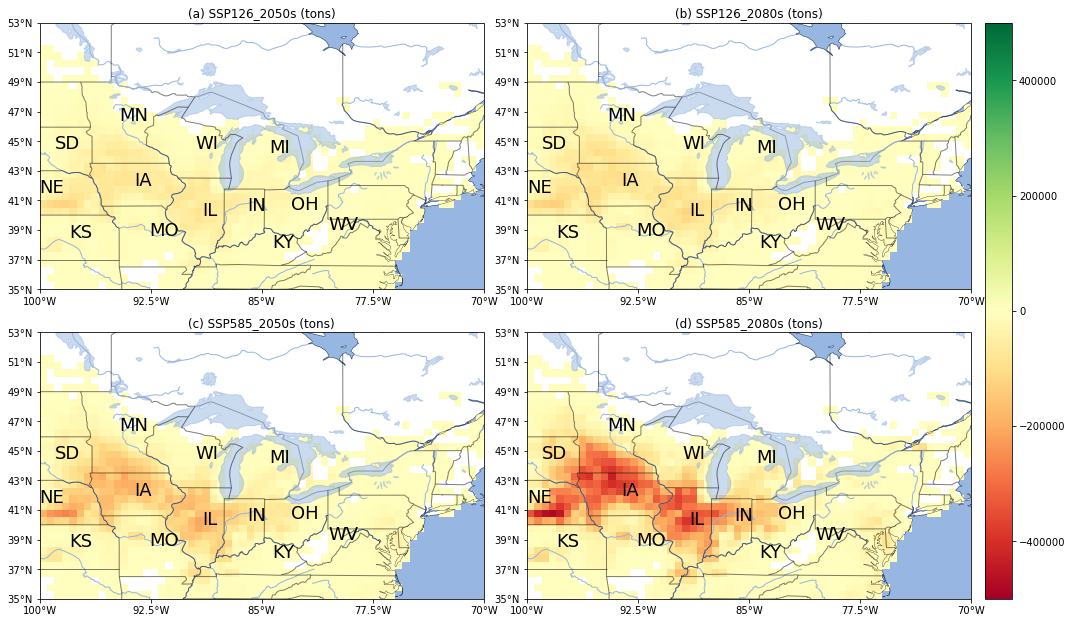

In [20]:
productionChange=np.full((4,60, 60), np.nan)
lats = averages2050s_ssp126.coords['lat'][:]
lons = averages2050s_ssp126.coords['lon'][:]
X,Y = np.meshgrid(lons,lats)
projection = ccrs.PlateCarree()
provinc_bodr = cartopy.feature.NaturalEarthFeature(category='cultural',
    name='admin_1_states_provinces_lines', scale='50m', facecolor='none', edgecolor='k')
axes_class = (GeoAxes,
              dict(map_projection=projection))
# lons, lats = np.meshgrid(lons, lats)
title_text=["Refereance", "2050s", "2080s"]
fig = plt.figure(figsize=(15,15))
axgr = AxesGrid(fig, 111, axes_class=axes_class,
                nrows_ncols=(2, 2),
                axes_pad=0.6,
                cbar_location='right',
                cbar_mode='single',
                cbar_pad=0.2,
                cbar_size='3%',
                label_mode='')  # note the empty labe
for i, ax in enumerate(axgr):
#*************************************************************
    if i==0:
        data=averages2050s_ssp126['yield change'].squeeze()
        productionChange[0,:,:]=data
        subtitle="(a) SSP126_2050s (tons)"
        print([np.nanpercentile(data,99.0),np.nanpercentile(data,0)])
        print([np.nanpercentile(data[37:56,:40],99.0),np.nanpercentile(data[37:56,:40],0)])
        print([np.nanpercentile(data[37:56,:40],50.0),np.nanmean(data[37:56,:40])])          
    if i==1:
        data=averages2080s_ssp126['yield change'].squeeze()
        productionChange[1,:,:]=data        
        subtitle="(b) SSP126_2080s (tons)" 
        print([np.nanpercentile(data,99.0),np.nanpercentile(data,0)])
        print([np.nanpercentile(data[37:56,:40],99.0),np.nanpercentile(data[37:56,:40],0)])
        print([np.nanpercentile(data[37:56,:40],50.0),np.nanmean(data[37:56,:40])])          
#     if i==2:
#         data=averages2050s_ssp370['yield change'].squeeze()
#         subtitle="(c) SSP370_2050s (%)"        
#     if i==3:
#         data=averages2080s_ssp370['yield change'].squeeze()
#         subtitle="(d) SSP370_2080s (%)"        
    if i==2:
        data=averages2050s_ssp585['yield change'].squeeze()
        productionChange[2,:,:]=data        
        subtitle="(c) SSP585_2050s (tons)"
        print([np.nanpercentile(data,99.0),np.nanpercentile(data,0)])
        print([np.nanpercentile(data[37:56,:40],99.0),np.nanpercentile(data[37:56,:40],0)])
        print([np.nanpercentile(data[37:56,:40],50.0),np.nanmean(data[37:56,:40])])          
    if i==3:
        data=averages2080s_ssp585['yield change'].squeeze()
        productionChange[3,:,:]=data        
        subtitle="(d) SSP585_2080s (tons)" 
        print([np.nanpercentile(data,99.0),np.nanpercentile(data,0)])
        print([np.nanpercentile(data[37:56,:40],99.0),np.nanpercentile(data[37:56,:40],0)])
        print([np.nanpercentile(data[37:56,:40],50.0),np.nanmean(data[37:56,:40])])          
#add ocean, coastline,borders,lakes,rivers,provinc_bodr
    ax.add_feature(cfeature.OCEAN)
    ax.add_feature(cfeature.COASTLINE,linewidth=0.3)
    ax.add_feature(cfeature.BORDERS, linestyle='-', alpha=0.5)
    ax.add_feature(cfeature.LAKES, alpha=0.5)
    ax.add_feature(cfeature.RIVERS)
    ax.add_feature(provinc_bodr, linestyle='-', linewidth=1, edgecolor="k", zorder=10, alpha=0.5)
    ax.set_title(subtitle)
    ax.set_xlim([-100,-70])
    ax.set_ylim([35,53])
    ax.set_xticks(np.linspace(-100, -70, 5), crs=projection)
    ax.set_yticks(np.linspace(35, 53, 10), crs=projection)
    lon_formatter = LongitudeFormatter(zero_direction_label=True)
    lat_formatter = LatitudeFormatter()
    ax.xaxis.set_major_formatter(lon_formatter)
    ax.yaxis.set_major_formatter(lat_formatter)
    
#     p = ax.contourf(lons, lats, data,50,
#                         transform=projection,
#                         cmap='BrBG')
    
#     l = ax.contour(lons, lats, data,25,colors=['black'], linewidth=0.3,
#                         transform=ccrs.PlateCarree())
    for iprov in range(26):
        if Longitudes[iprov]<-80 and Latitudes[iprov]<47:
            ax.text(Longitudes[iprov],Latitudes[iprov],provinces1[iprov],fontsize=18)
#     p = ax.pcolormesh(X, Y, data,
#                       vmin=-300,
#                       vmax=300,
#                       transform=projection,
#                       cmap='Reds')
    p = ax.pcolormesh(X, Y, data,
                      transform=projection,
                      vmin=-500000,
                      vmax=500000,
                      cmap='RdYlGn')    
#     ax.clabel(
#         l,  # Typically best results when labelling line contours.
#         colors=['black'],
#         manual=False,  # Automatic placement vs manual placement.
#         inline=True,  # Cut the line where the label will be placed.
#         fmt=' {:.0f} '.format,  # Labes as integers, with some extra space.
#     )
axgr.cbar_axes[0].colorbar(p)
plt.tight_layout()
plt.show()
fig.savefig('SSP126_SSP585_Productionchange_2050s2080s_relative_to1995-2014_20Years.png',dpi=150)
np.save('SSP126_SSP585_Productionchange_2050s2080s_relative_to1995-2014_20Years.npy',productionChange)

##### Figure.Geographic patterns in crop productivity for the 21st century for maize in GLR under SSP126 and SSP585. The values are calcuated as the change in ensemble mean of all climate-crop model combinations (5 GCMs X 12 GGCMs) relative to the reference period 1995-2014. 